#### Jupyter notebook to integrate a black body function to find the number of ionizing photons. 

Importing relevant packages and setting constants (in cgs units)

In [135]:
import numpy
import matplotlib.pyplot as plt
from scipy import integrate

k=1.3806e-16 #Boltzmann constant cgs (erg/K)
c=3e10 #speed of light cgs (cm/s)
h=6.626e-27 #Planck constant cgs (erg.s)


Setting up a blackbody function as a function of wavelength, same as the IDL function PLANCK(); then running a test to see that it is producing the correct shape. 

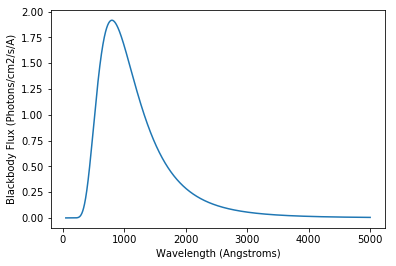

In [136]:
T=30000 #K

def planck(wave):
    w = wave/10**8.0
    c1 = 2.0*numpy.pi*h*c*c
    c2 = h*c
    val = c2/(w*k*T)
    bbflux = c1 / (w**5.0 * (numpy.exp(val - 1.0)))
    #return bbflux*(10**-8.0) #ergs/cm2/s/A
    return bbflux*h*c/wave #photons/cm2/s/A


wave = numpy.arange(50,5000)
wave = numpy.array(wave)
bbflux = planck(wave)
                   
plt.plot(wave,bbflux)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Blackbody Flux (Photons/cm2/s/A)')
plt.show()


1. Testing the built in integration function, which returns the integral and the absolute error in the result.
2. Syntax: integrate.quad(function, lower limit, upper limit)
3. Results in units of Photons/cm2/s

In [137]:
print(integrate.quad(planck,1000,1100))

(156.29284063764578, 1.7351991025998468e-12)


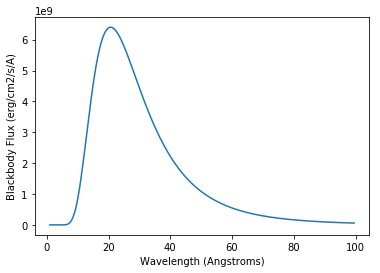

(56672090429.07612, 0.0006291865964799928)
(164935980807.5283, 8.635264109034324)
(164895033354.8954, 5.548366002092735)


In [138]:
T = 1.16e6  #K, corresponds to kT = 0.1keV

wave = numpy.arange(1,100,0.5)
wave = numpy.array(wave)
bbflux = planck(wave)

plt.plot(wave,bbflux)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Blackbody Flux (erg/cm2/s/A)')
plt.show()

print(integrate.quad(planck,20,30)) #test
print(integrate.quad(planck,1,504)) #504A = 24.6eV
print(integrate.quad(planck,1,227.9)) #227.9A = 54.4eV

Double check values by running in frequency domain

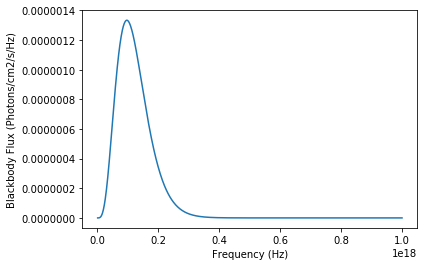

(43236472.088013664, 4.800282911165965e-07)
(164935982752.7182, 425.0370230078697)
(164895231346.4259, 197.1035413146019)


In [139]:
T = 1.16e6 #K, corresponds to kT = 0.1keV

def planck_nu(freq):
    c1 = 2.0*numpy.pi*h*(freq**3.0)
    c2 = h*c
    val = h*freq/(k*T)
    bbflux = c1 / (c**2.0 * (numpy.exp(val - 1.0)))
    #return bbflux #ergs/cm2/s/Hz
    return bbflux*h*freq  #photons/cm2/s/Hz

freq = numpy.arange(1e15,1e18,1e15)
freq = numpy.array(freq)
bbflux = planck_nu(freq)
                   
plt.plot(freq,bbflux)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Blackbody Flux (Photons/cm2/s/Hz)')
plt.show()

print(integrate.quad(planck_nu,0.4e18,1e18)) #test
print(integrate.quad(planck_nu,5.95e15,1e18)) #5.95e15 Hz = 24.6 eV
print(integrate.quad(planck_nu,1.315e16,1e18)) #1.315e16 Hz = 54.4 eV